In [2]:
!pip install plotly==5.7.0

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import operator
import plotly.express as px
df = pd.read_csv("./data/maps-synthetic-data-v1.1.csv")

In [4]:
myfield = df["has_dep_diag"]
freq = myfield.value_counts()
counts = freq.values
labels = freq.index.tolist()
percentages = freq/freq.sum()
cumulative = percentages.cumsum()
cumulative

 No ICD-10 diagnosis of depression    0.913805
Yes ICD-10 diagnosis of depression    1.000000
Name: has_dep_diag, dtype: float64

<ipython-input-5-706f357284e9>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


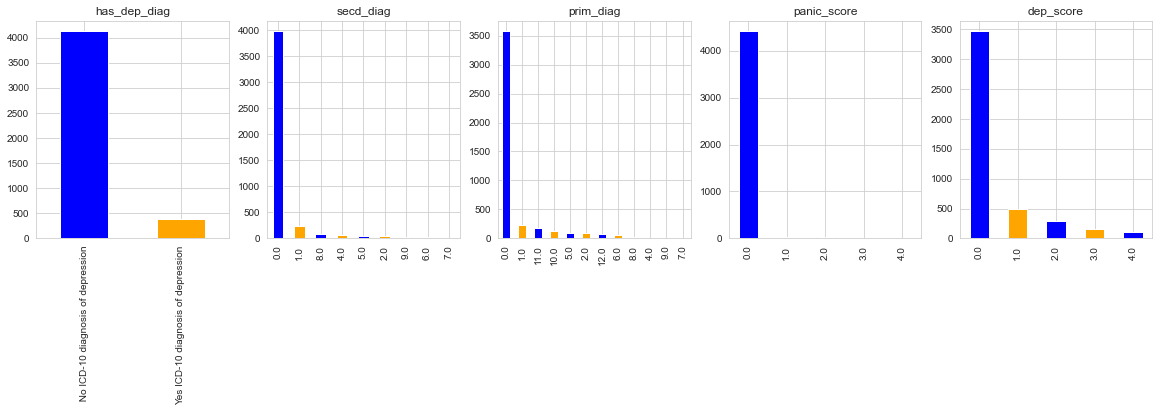

In [5]:
import seaborn as sns
sns.set_style("whitegrid")
categorical_features = ["has_dep_diag","secd_diag","prim_diag","panic_score","dep_score"]
cols = 5
rows = 1
fig, ax = plt.subplots(ncols=cols,nrows=rows,figsize=(20,4))
f=0
for i in range(cols):
        df[categorical_features[f]].value_counts().plot(kind = "bar",stacked=True, ax=ax[i],color=['blue', 'orange']).set_title(categorical_features[f])
        f+=1
fig.show()


<ipython-input-7-fc89b4c4e02b>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


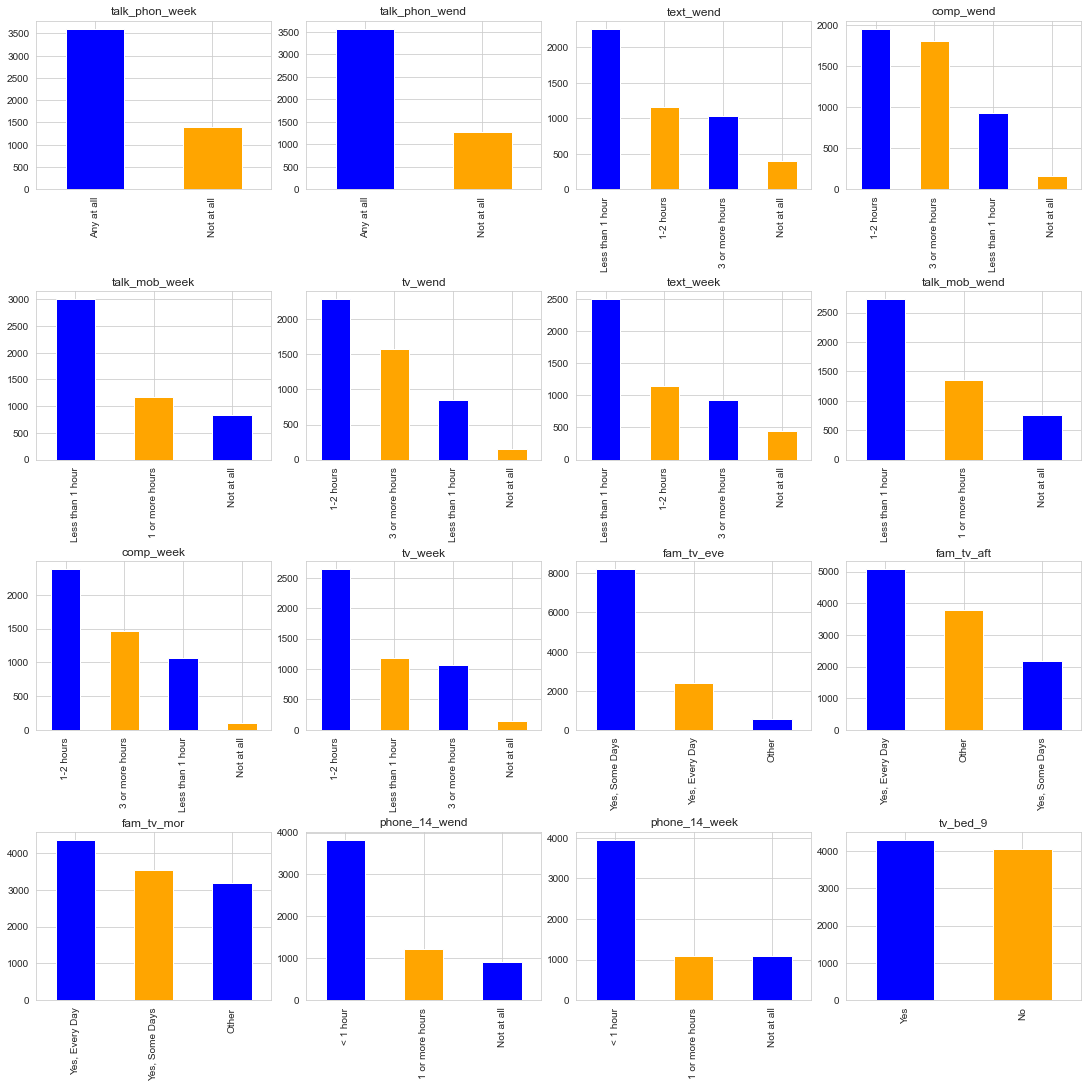

In [7]:
categorical_features = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","tv_bed_9"]
cols = 4
rows = 4
sns.set_style("whitegrid")
fig, ax = plt.subplots(ncols=cols,nrows=rows,figsize=(15,15),constrained_layout=True)
#plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=None, hspace=None)
f=0
for i in range(rows):
    for j in range(cols):
        df[categorical_features[f]].value_counts().plot(kind = "bar",stacked=True, ax=ax[i][j],color=['blue', 'orange']).set_title(categorical_features[f])
        f+=1
fig.show()
plt.savefig("test.svg", format="svg")


In [8]:
categorical_features = ["has_dep_diag","secd_diag","prim_diag","panic_score","dep_score","dep_band_15","dep_band_13","dep_band_10","dep_band_07","anx_band_15","anx_band_13","anx_band_10","anx_band_07"]

df['has_dep_diag'] = pd.Categorical(df.has_dep_diag)
df['secd_diag'] = pd.Categorical(df.secd_diag)
df['prim_diag'] = pd.Categorical(df.prim_diag)
df['panic_score'] = pd.Categorical(df.panic_score)
df['dep_score'] = pd.Categorical(df.dep_score)
df[categorical_features].describe(include='all')

,has_dep_diag,secd_diag,prim_diag,panic_score,dep_score,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07
count,4513,4513.0,4513.0,4513.0,4513.0,5299,7003,7679,8089,5303,7158,7852,8280
unique,2,9.0,12.0,5.0,5.0,5,5,5,4,5,6,6,5
top,No ICD-10 diagnosis of depression,0.0,0.0,0.0,0.0,~0.5%,<0.1%,<0.1%,<0.1%,~3%,~3%,~3%,~3%
freq,4124,3980.0,3573.0,4413.0,3463.0,2976,4022,4500,5050,2740,3821,4167,3907


In [9]:
percentages = []
categorical_features = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","tv_bed_9"]
df[categorical_features].describe(include='all')

,talk_phon_week,talk_phon_wend,text_wend,comp_wend,talk_mob_week,tv_wend,text_week,talk_mob_wend,comp_week,tv_week,fam_tv_eve,fam_tv_aft,fam_tv_mor,phone_14_wend,phone_14_week,tv_bed_9
count,4999,4850,4841,4839,5016,4853,5004,4834,5011,5020,11174,11038,11096,5962,6131,8348
unique,2,2,4,4,3,4,4,3,4,4,3,3,3,3,3,2
top,Any at all,Any at all,Less than 1 hour,1-2 hours,Less than 1 hour,1-2 hours,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,"Yes, Some Days","Yes, Every Day","Yes, Every Day",< 1 hour,< 1 hour,Yes
freq,3602,3568,2261,1950,3001,2287,2495,2728,2375,2634,8199,5065,4360,3828,3949,4300


In [10]:
categorical_features = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","tv_bed_9"]
testdf = df.loc[df['has_dep_diag'] == "Yes ICD-10 diagnosis of depression"]
testdf[categorical_features].describe(include='all')

,talk_phon_week,talk_phon_wend,text_wend,comp_wend,talk_mob_week,tv_wend,text_week,talk_mob_wend,comp_week,tv_week,fam_tv_eve,fam_tv_aft,fam_tv_mor,phone_14_wend,phone_14_week,tv_bed_9
count,253,250,249,247,256,249,254,249,256,256,351,351,343,271,278,321
unique,2,2,4,4,3,4,4,3,4,4,3,3,3,3,3,2
top,Any at all,Any at all,Less than 1 hour,3 or more hours,Less than 1 hour,1-2 hours,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,"Yes, Some Days","Yes, Every Day","Yes, Every Day",< 1 hour,< 1 hour,No
freq,176,177,102,99,148,112,114,141,116,136,242,149,133,169,171,175


In [11]:
testdf2 = df.loc[df['has_dep_diag'] == " No ICD-10 diagnosis of depression"]
testdf2[categorical_features].describe(include='all')

,talk_phon_week,talk_phon_wend,text_wend,comp_wend,talk_mob_week,tv_wend,text_week,talk_mob_wend,comp_week,tv_week,fam_tv_eve,fam_tv_aft,fam_tv_mor,phone_14_wend,phone_14_week,tv_bed_9
count,2899,2837,2834,2830,2908,2836,2899,2827,2907,2909,3696,3647,3668,2964,3051,3402
unique,2,2,4,4,3,4,4,3,4,4,3,3,3,3,3,2
top,Any at all,Any at all,Less than 1 hour,1-2 hours,Less than 1 hour,1-2 hours,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,"Yes, Some Days","Yes, Every Day","Yes, Every Day",< 1 hour,< 1 hour,No
freq,2084,2106,1395,1155,1813,1352,1534,1663,1369,1541,2580,1630,1484,1941,2004,1959


{'talk_phon_week': 0.02321640145777404, 'talk_phon_wend': 0.0343334508283398, 'text_wend': 0.04129928323031008, 'comp_wend': 0.006904050013590648, 'talk_mob_week': 0.030218363136176086, 'tv_wend': 0.01622569261531315, 'text_week': 0.04016454221249249, 'talk_mob_wend': 0.014660694422543382, 'comp_week': 0.024231649896800826, 'tv_week': 0.013175033301821942, 'fam_tv_eve': 0.014013764013763986, 'fam_tv_aft': 0.01644823269903244, 'fam_tv_mor': 0.01962922573609599, 'phone_14_wend': 0.0354919136235897, 'phone_14_week': 0.027817274204235437, 'tv_bed_9': 0.03066640294054629}


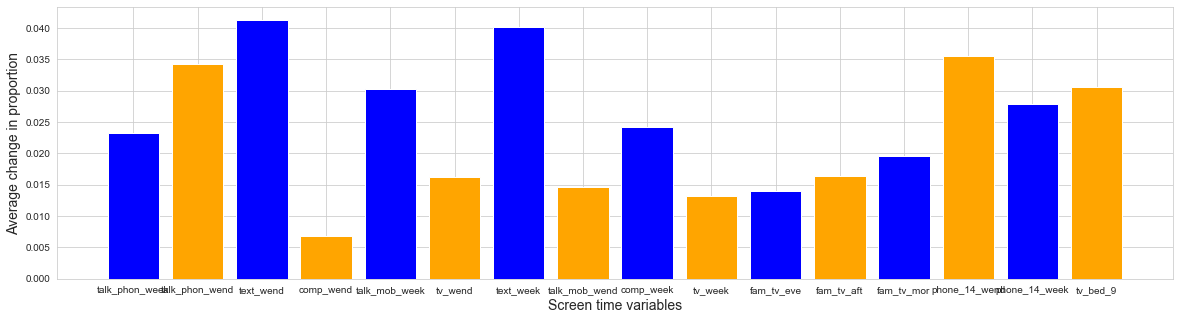

In [16]:
sns.set_style("whitegrid")
avg_percent_diff = {}
for category in categorical_features:
    percentages = testdf2[category].value_counts() / testdf2[category].value_counts().sum()
    percentages2 = testdf[category].value_counts() / testdf[category].value_counts().sum()
    output = percentages.copy()
    total = 0
    for i in range(len(output)):
        total += abs(percentages[i]- percentages2[i])
    avg = total/len(output)
    avg_percent_diff[category]= avg
    #percentages[0] =percentages[0] - percentages2[0]
    #print(percentages[0])
print(avg_percent_diff)
names = list(avg_percent_diff.keys())
values = list(avg_percent_diff.values())
plt.rc('axes', labelsize=14) 
f, ax = plt.subplots(figsize=(20,5))
plt.bar(range(len(avg_percent_diff)), values, tick_label=names,color=['blue', 'orange'])
plt.xlabel("Screen time variables")
plt.ylabel("Average change in proportion")
plt.savefig("test.svg", format="svg")

<ipython-input-216-3287077c93bb>:12: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



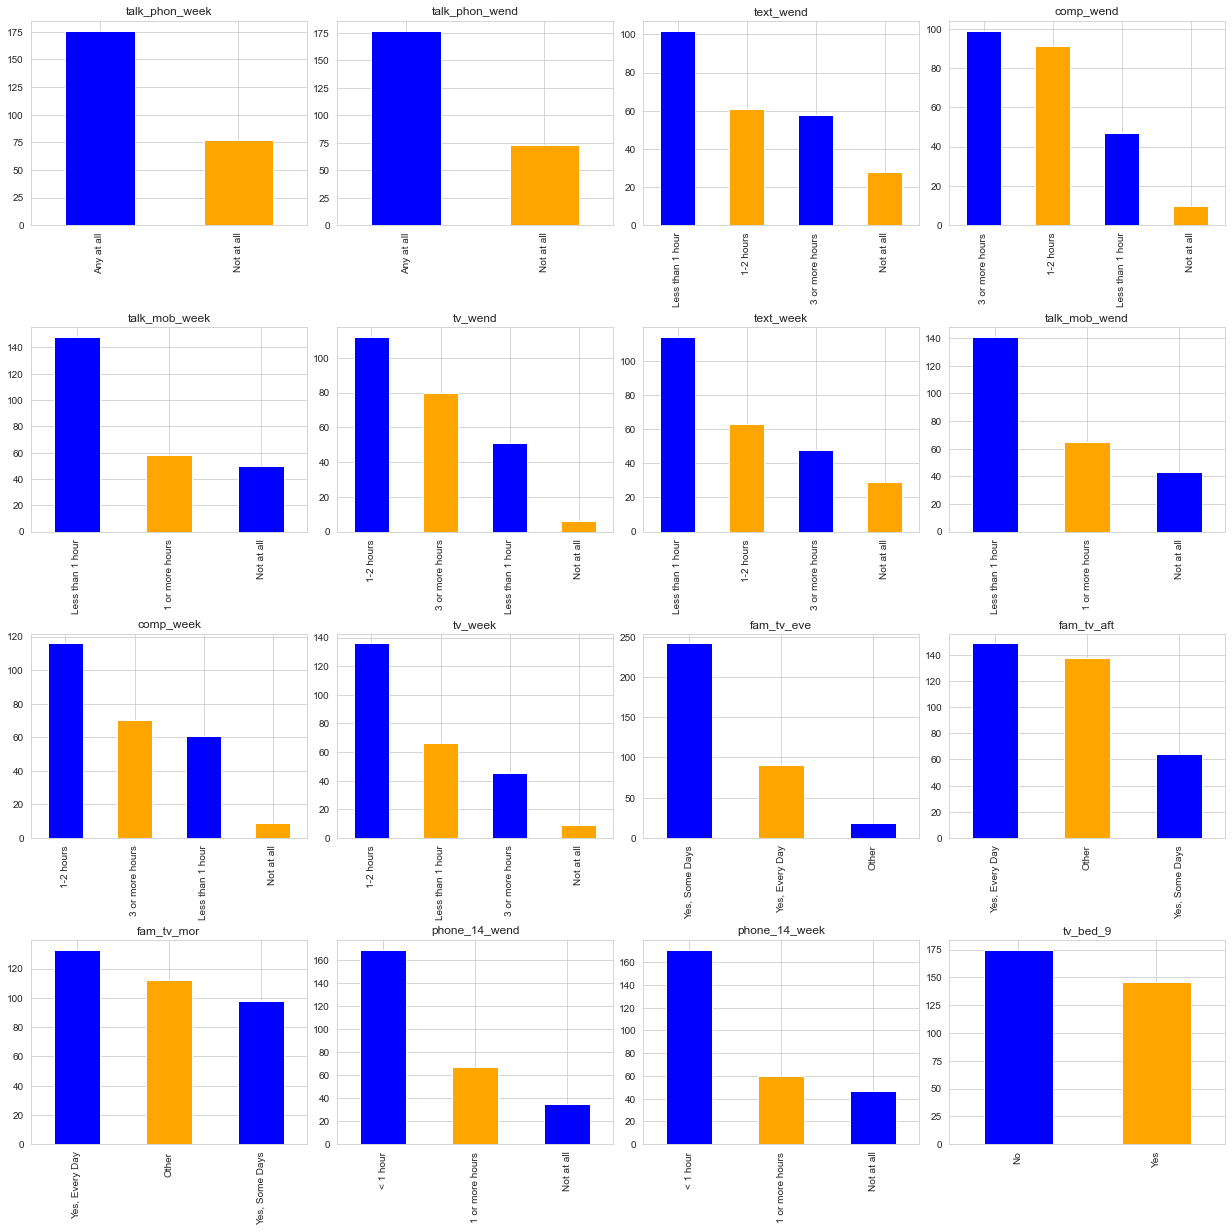

In [216]:
categorical_features = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","tv_bed_9"]
cols = 4
rows = 4
sns.set_style("whitegrid")
fig, ax = plt.subplots(ncols=cols,nrows=rows,figsize=(17,17),constrained_layout=True)
#plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=None, hspace=None)
f=0
for i in range(rows):
    for j in range(cols):
        testdf[categorical_features[f]].value_counts().plot(kind = "bar",stacked=True, ax=ax[i][j],color=['blue', 'orange']).set_title(categorical_features[f])
        f+=1
fig.show()
plt.savefig("test.svg", format="svg")

<Figure size 1080x1080 with 0 Axes>

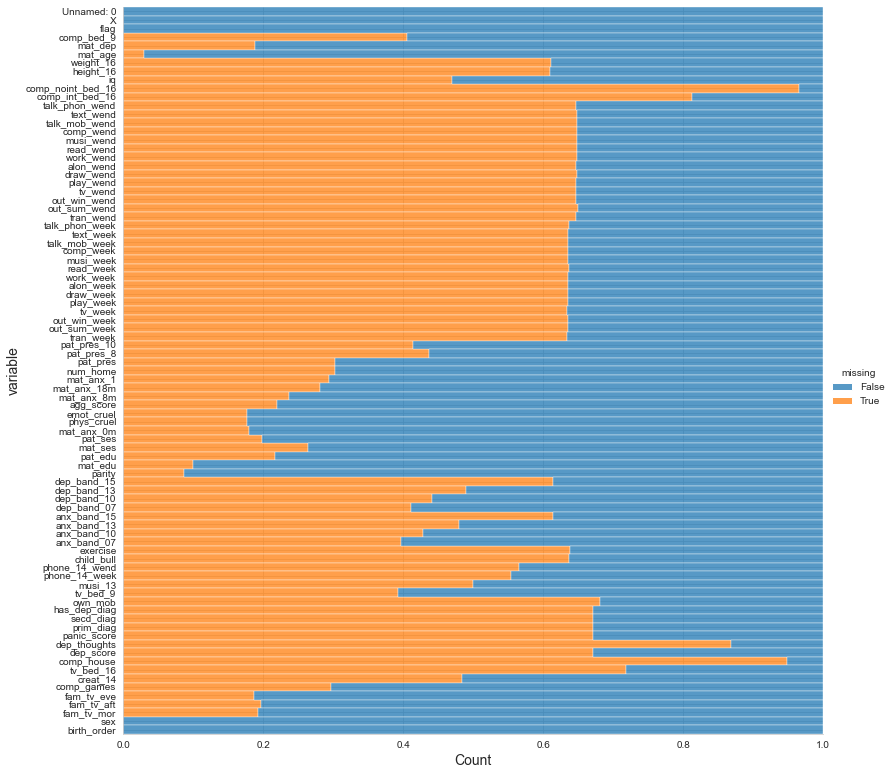

In [19]:
plt.figure(figsize=(15,15))
g = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3
)
g.fig.set_size_inches(12,12)
plt.savefig("test.svg", format="svg")

               0
count  85.000000
mean    0.482574
std     0.235299
min     0.000000
25%     0.293724
50%     0.613878
75%     0.646862
max     0.965706
-0.5401155460353062


Text(0.5, 0, 'Propotion of missing values')

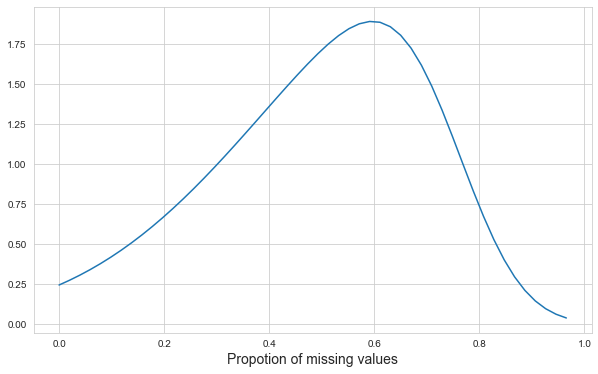

In [26]:
from scipy.stats import skewnorm
percentages = []
for col in df.columns:
    percentages.append(df[col].isnull().sum()/len(df[col]))
df_describe = pd.DataFrame(percentages)
df_describe.describe()
print(df_describe.describe())
print(skew(percentages))
plt.figure(figsize=(10,6))
X = np.linspace(min(percentages), max(percentages))
plt.plot(X, skewnorm.pdf(X, *skewnorm.fit(percentages)))
plt.xlabel("Propotion of missing values")

shows comp_no_int can be removed and comphouse and dep thoughts. aka set the threshhold to 70% as important vartiables are at 67%


In [18]:
from scipy import stats
from scipy.stats import chi2_contingency
passing_has_dep=[]
for col in df.columns:
    contingency = pd.crosstab(index=df[col], columns=df['has_dep_diag'],margins=True)
    stat, p, dof, expected = chi2_contingency(contingency)
  
    alpha = 0.05
    #print("p value for "+col+" is " + str(p))
    if p <= alpha:
        #print("p value for "+col+" is " + str(p))
        #print('Dependent (reject H0)')
        passing_has_dep.append(col)
    else:
        #print('Independent (H0 holds true)')
        hello=1
passing_all_deps = []
depressedcols = ["secd_diag","prim_diag","panic_score","dep_score"]
for dep in depressedcols:
    for col in df.columns:
        contingency = pd.crosstab(index=df[col], columns=df[dep],margins=True)
        stat, p, dof, expected = chi2_contingency(contingency)

        alpha = 0.025
        #print("p value for "+col+" is " + str(p))
        if p <= alpha:
            #print("p value for "+col+" is " + str(p))
            #print('Dependent (reject H0)')
            if col not in passing_all_deps:
                passing_all_deps.append(col)
        else:
            #print('Independent (H0 holds true)')
            hello=1
print(passing_has_dep)
print(passing_all_deps)
#fig = plt.figure(figsize=(6,6))
#sns.heatmap(resultant, annot=True, cmap='Blues')
#plt.title('Chi-Square Test Results')
#plt.show()

['parity', 'dep_band_15', 'has_dep_diag', 'secd_diag', 'prim_diag', 'panic_score', 'dep_thoughts', 'dep_score', 'sex']
['agg_score', 'dep_band_15', 'dep_band_10', 'anx_band_15', 'has_dep_diag', 'secd_diag', 'prim_diag', 'panic_score', 'dep_thoughts', 'dep_score', 'sex', 'birth_order', 'pat_edu', 'child_bull', 'mat_age', 'anx_band_07', 'mat_anx_0m']


In [3]:
display(df)
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix

passing_all_deps = []
depressedcols = ["secd_diag","prim_diag","panic_score","dep_score"]
for row in df.columns:
    for col in df.columns:
        if (row!=col):
            test = df[[col,row]]
            test = test.dropna()
            #display(test)
            contingency = pd.crosstab(index=test[col], columns=test[row],margins=True)
            stat, p, dof, expected = chi2_contingency(contingency)
            resultant.loc[row,col] = p
            #alpha = 0.025
            print(row+' vs '+col+' = '+str(p))
            #print("p value for "+col+" is " + str(p))
            #if p <= alpha:
                #print("p value for "+col+" is " + str(p))
                #print('Dependent (reject H0)')
                #if col not in passing_all_deps:
                    #passing_all_deps.append(col)
            #else:
                #print('Independent (H0 holds true)')
                #hello=1
print(resultant)

,Unnamed: 0,X,flag,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,...,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
0,1,1,synthetic,NaN,3.0,30,59.294132,181.602831,107.0,NaN,...,0.0,Yes,Yes,often,No,"Yes, Some Days",Other,"Yes, Every Day",Female,A
1,2,2,synthetic,NaN,9.0,26,NaN,NaN,85.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,B
2,3,3,synthetic,NaN,3.0,24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Yes, Some Days","Yes, Every Day",Other,Male,A
3,4,4,synthetic,No,NaN,22,49.812426,160.224186,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Male,A
4,5,5,synthetic,No,8.0,31,62.270030,191.703227,132.0,Yes,...,NaN,NaN,NaN,often,No,"Yes, Some Days","Yes, Every Day","Yes, Every Day",Female,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,13730,13730,synthetic,NaN,13.0,27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Yes, Every Day","Yes, Every Day","Yes, Every Day",Female,A
13730,13731,13731,synthetic,No,6.0,29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,"Yes, Every Day",Other,Other,Male,A
13731,13732,13732,synthetic,NaN,21.0,37,58.075832,169.235565,108.0,NaN,...,NaN,NaN,NaN,often,No,Other,Other,Other,Male,A
13732,13733,13733,synthetic,No,10.0,30,NaN,NaN,103.0,NaN,...,0.0,Yes,NaN,sometimes,No,"Yes, Some Days",Other,"Yes, Every Day",Male,A


Unnamed: 0 vs X = 0.7602446062631142
Unnamed: 0 vs flag = 1.0
Unnamed: 0 vs comp_bed_9 = 1.0
Unnamed: 0 vs mat_dep = 1.0
Unnamed: 0 vs mat_age = 1.0
Unnamed: 0 vs weight_16 = 0.7602773244772696
Unnamed: 0 vs height_16 = 0.7602362872495712
Unnamed: 0 vs iq = 0.999999998790309
Unnamed: 0 vs comp_noint_bed_16 = 1.0
Unnamed: 0 vs comp_int_bed_16 = 1.0
Unnamed: 0 vs talk_phon_wend = 1.0
Unnamed: 0 vs text_wend = 1.0
Unnamed: 0 vs talk_mob_wend = 1.0
Unnamed: 0 vs comp_wend = 1.0
Unnamed: 0 vs musi_wend = 1.0
Unnamed: 0 vs read_wend = 1.0
Unnamed: 0 vs work_wend = 1.0
Unnamed: 0 vs alon_wend = 1.0
Unnamed: 0 vs draw_wend = 1.0
Unnamed: 0 vs play_wend = 1.0
Unnamed: 0 vs tv_wend = 1.0
Unnamed: 0 vs out_win_wend = 1.0
Unnamed: 0 vs out_sum_wend = 1.0
Unnamed: 0 vs tran_wend = 1.0
Unnamed: 0 vs talk_phon_week = 1.0
Unnamed: 0 vs text_week = 1.0
Unnamed: 0 vs talk_mob_week = 1.0
Unnamed: 0 vs comp_week = 1.0
Unnamed: 0 vs musi_week = 1.0
Unnamed: 0 vs read_week = 1.0
Unnamed: 0 vs work_week = 1.

comp_bed_9 vs mat_anx_18m = 0.9999471890818599
comp_bed_9 vs mat_anx_8m = 0.6235771107979422
comp_bed_9 vs agg_score = 0.9473916519757288
comp_bed_9 vs emot_cruel = 0.996451780346987
comp_bed_9 vs phys_cruel = 0.9699076744542089
comp_bed_9 vs mat_anx_0m = 0.9631594238509494
comp_bed_9 vs pat_ses = 6.227925782252295e-15
comp_bed_9 vs mat_ses = 0.003820379596646384
comp_bed_9 vs pat_edu = 8.765064035156946e-14
comp_bed_9 vs mat_edu = 2.006870910777231e-09
comp_bed_9 vs parity = 0.28240051883091444
comp_bed_9 vs dep_band_15 = 0.6472568621285731
comp_bed_9 vs dep_band_13 = 0.9732736948128485
comp_bed_9 vs dep_band_10 = 0.3101360859937701
comp_bed_9 vs dep_band_07 = 0.9173304266486028
comp_bed_9 vs anx_band_15 = 0.25796772485513614
comp_bed_9 vs anx_band_13 = 0.9997693016516925
comp_bed_9 vs anx_band_10 = 0.31026144254686516
comp_bed_9 vs anx_band_07 = 0.0004112196054433265
comp_bed_9 vs exercise = 0.8898860535753551
comp_bed_9 vs child_bull = 0.999974153226947
comp_bed_9 vs phone_14_wend =

mat_age vs panic_score = 1.6716642678585446e-08
mat_age vs dep_thoughts = 0.6508737403858601
mat_age vs dep_score = 0.9390181795420028
mat_age vs comp_house = 1.0
mat_age vs tv_bed_16 = 1.0
mat_age vs creat_14 = 0.9993832401298876
mat_age vs comp_games = 0.9988866846569475
mat_age vs fam_tv_eve = 3.9857728985596414e-27
mat_age vs fam_tv_aft = 6.235665652254241e-12
mat_age vs fam_tv_mor = 4.408793884091832e-38
mat_age vs sex = 0.043119975390891054
mat_age vs birth_order = 0.9933455898462142
weight_16 vs Unnamed: 0 = 0.7602773244518738
weight_16 vs X = 0.7602773244518738
weight_16 vs flag = 1.0
weight_16 vs comp_bed_9 = 1.0
weight_16 vs mat_dep = 1.0
weight_16 vs mat_age = 1.0
weight_16 vs height_16 = 0.7602773244518738
weight_16 vs iq = 0.9999996572075063
weight_16 vs comp_noint_bed_16 = 1.0
weight_16 vs comp_int_bed_16 = 1.0
weight_16 vs talk_phon_wend = 1.0
weight_16 vs text_wend = 1.0
weight_16 vs talk_mob_wend = 1.0
weight_16 vs comp_wend = 1.0
weight_16 vs musi_wend = 1.0
weight_16

iq vs prim_diag = 0.24908333428410184
iq vs panic_score = 0.7753910444411061
iq vs dep_thoughts = 0.9995431849413389
iq vs dep_score = 0.9798356729722622
iq vs comp_house = 1.0
iq vs tv_bed_16 = 1.0
iq vs creat_14 = 0.6060521032440392
iq vs comp_games = 0.9999999952781466
iq vs fam_tv_eve = 0.031030503749205036
iq vs fam_tv_aft = 0.6387073884286306
iq vs fam_tv_mor = 0.17340413096583246
iq vs sex = 0.9999998958522058
iq vs birth_order = 1.0
comp_noint_bed_16 vs Unnamed: 0 = 1.0
comp_noint_bed_16 vs X = 1.0
comp_noint_bed_16 vs flag = 1.0
comp_noint_bed_16 vs comp_bed_9 = 1.0
comp_noint_bed_16 vs mat_dep = 1.0
comp_noint_bed_16 vs mat_age = 1.0
comp_noint_bed_16 vs weight_16 = 1.0
comp_noint_bed_16 vs height_16 = 1.0
comp_noint_bed_16 vs iq = 1.0
comp_noint_bed_16 vs comp_int_bed_16 = 1.0
comp_noint_bed_16 vs talk_phon_wend = 1.0
comp_noint_bed_16 vs text_wend = 1.0
comp_noint_bed_16 vs talk_mob_wend = 1.0
comp_noint_bed_16 vs comp_wend = 1.0
comp_noint_bed_16 vs musi_wend = 1.0
comp_no

talk_phon_wend vs pat_pres_8 = 0.6795503747611124
talk_phon_wend vs pat_pres = 0.9999999910824631
talk_phon_wend vs num_home = 0.31997304410913663
talk_phon_wend vs mat_anx_1 = 0.9259732578695902
talk_phon_wend vs mat_anx_18m = 0.06877321228962413
talk_phon_wend vs mat_anx_8m = 0.9945170590672873
talk_phon_wend vs agg_score = 0.9542995886839553
talk_phon_wend vs emot_cruel = 0.9339478184022675
talk_phon_wend vs phys_cruel = 0.4806974106260573
talk_phon_wend vs mat_anx_0m = 0.917506559216669
talk_phon_wend vs pat_ses = 0.785997363230057
talk_phon_wend vs mat_ses = 0.983547909179817
talk_phon_wend vs pat_edu = 0.9583298743091883
talk_phon_wend vs mat_edu = 0.5892540327386077
talk_phon_wend vs parity = 0.4283308576454227
talk_phon_wend vs dep_band_15 = 0.9340692729216495
talk_phon_wend vs dep_band_13 = 0.9998419243998584
talk_phon_wend vs dep_band_10 = 0.8870384130597603
talk_phon_wend vs dep_band_07 = 0.24988133993392583
talk_phon_wend vs anx_band_15 = 0.8683762076150074
talk_phon_wend v

talk_mob_wend vs mat_ses = 0.0832928594212944
talk_mob_wend vs pat_edu = 6.803121795343906e-15
talk_mob_wend vs mat_edu = 3.422840767165795e-14
talk_mob_wend vs parity = 0.9091606129699652
talk_mob_wend vs dep_band_15 = 0.003669831285535541
talk_mob_wend vs dep_band_13 = 0.9974578263900209
talk_mob_wend vs dep_band_10 = 0.14061978616922752
talk_mob_wend vs dep_band_07 = 0.4871600120711138
talk_mob_wend vs anx_band_15 = 0.9318132115169707
talk_mob_wend vs anx_band_13 = 0.9894016234388578
talk_mob_wend vs anx_band_10 = 0.049260827404800395
talk_mob_wend vs anx_band_07 = 0.9997222625123244
talk_mob_wend vs exercise = 0.8806250660270518
talk_mob_wend vs child_bull = 0.7837589530322591
talk_mob_wend vs phone_14_wend = 1.8307328760933685e-44
talk_mob_wend vs phone_14_week = 1.7420144630618772e-28
talk_mob_wend vs musi_13 = 0.34616813769788696
talk_mob_wend vs tv_bed_9 = 7.526628139034687e-09
talk_mob_wend vs own_mob = 0.0022760391974305763
talk_mob_wend vs has_dep_diag = 0.9936310851402144
t

musi_wend vs has_dep_diag = 0.8534604005850139
musi_wend vs secd_diag = 0.9981866847456735
musi_wend vs prim_diag = 0.9995686832788082
musi_wend vs panic_score = 0.9858964527518799
musi_wend vs dep_thoughts = 0.9801380764975027
musi_wend vs dep_score = 0.955331235790581
musi_wend vs comp_house = 1.0
musi_wend vs tv_bed_16 = 1.0
musi_wend vs creat_14 = 1.4500238699450775e-33
musi_wend vs comp_games = 0.148146438490531
musi_wend vs fam_tv_eve = 0.2826392772245886
musi_wend vs fam_tv_aft = 0.8136036148712656
musi_wend vs fam_tv_mor = 0.4054322877688523
musi_wend vs sex = 0.0008020424777414162
musi_wend vs birth_order = 0.055141350136708754
read_wend vs Unnamed: 0 = 1.0
read_wend vs X = 1.0
read_wend vs flag = 1.0
read_wend vs comp_bed_9 = 0.21710812627538623
read_wend vs mat_dep = 0.9814384037170838
read_wend vs mat_age = 0.4494893541794903
read_wend vs weight_16 = 1.0
read_wend vs height_16 = 1.0
read_wend vs iq = 0.011400952909607572
read_wend vs comp_noint_bed_16 = 1.0
read_wend vs com

alon_wend vs comp_noint_bed_16 = 1.0
alon_wend vs comp_int_bed_16 = 1.0
alon_wend vs talk_phon_wend = 0.8243136231479671
alon_wend vs text_wend = 1.9597565989144103e-08
alon_wend vs talk_mob_wend = 8.176946021404399e-17
alon_wend vs comp_wend = 1.981890650046175e-46
alon_wend vs musi_wend = 0.02075793399167786
alon_wend vs read_wend = 7.836910675987904e-19
alon_wend vs work_wend = 7.046377521706109e-29
alon_wend vs draw_wend = 1.1289918559325462e-05
alon_wend vs play_wend = 1.9000890777680451e-06
alon_wend vs tv_wend = 0.0009025441229955806
alon_wend vs out_win_wend = 0.471048961468847
alon_wend vs out_sum_wend = 0.03294170361858783
alon_wend vs tran_wend = 0.7488701305037354
alon_wend vs talk_phon_week = 0.44174952687044544
alon_wend vs text_week = 1.422571445156876e-07
alon_wend vs talk_mob_week = 2.0295396128938738e-11
alon_wend vs comp_week = 8.012902281793824e-14
alon_wend vs musi_week = 0.07470779931839688
alon_wend vs read_week = 1.0314635532283187e-11
alon_wend vs work_week = 7

play_wend vs alon_week = 0.1313369996312685
play_wend vs draw_week = 0.9748462714785233
play_wend vs play_week = 1.986063114745782e-95
play_wend vs tv_week = 0.0171064308922849
play_wend vs out_win_week = 1.5310317795610748e-26
play_wend vs out_sum_week = 2.6736527620535013e-32
play_wend vs tran_week = 0.5418238702813349
play_wend vs pat_pres_10 = 0.9621912911488468
play_wend vs pat_pres_8 = 0.4202785834277656
play_wend vs pat_pres = 0.7019605067865362
play_wend vs num_home = 0.988867568475635
play_wend vs mat_anx_1 = 0.7339285984945718
play_wend vs mat_anx_18m = 0.849991735587226
play_wend vs mat_anx_8m = 0.41060051279212517
play_wend vs agg_score = 0.7019676997206804
play_wend vs emot_cruel = 0.9933173657787002
play_wend vs phys_cruel = 0.9957145148561906
play_wend vs mat_anx_0m = 0.9987674972499645
play_wend vs pat_ses = 0.6685660523402945
play_wend vs mat_ses = 0.77535769435331
play_wend vs pat_edu = 0.23860590222120387
play_wend vs mat_edu = 0.759083889714815
play_wend vs parity =

out_win_wend vs mat_edu = 0.22947561846647327
out_win_wend vs parity = 0.2363544049011932
out_win_wend vs dep_band_15 = 0.7574534655413933
out_win_wend vs dep_band_13 = 0.949243528737996
out_win_wend vs dep_band_10 = 0.11674435241549432
out_win_wend vs dep_band_07 = 0.9883328543117667
out_win_wend vs anx_band_15 = 0.3863055582324954
out_win_wend vs anx_band_13 = 0.634029389786894
out_win_wend vs anx_band_10 = 0.5551641030442309
out_win_wend vs anx_band_07 = 0.98732366569052
out_win_wend vs exercise = 4.886420326340863e-16
out_win_wend vs child_bull = 0.7984379865083465
out_win_wend vs phone_14_wend = 0.5079866108597231
out_win_wend vs phone_14_week = 0.25972158145007684
out_win_wend vs musi_13 = 0.5401637706952052
out_win_wend vs tv_bed_9 = 0.2884739590754664
out_win_wend vs own_mob = 0.8361707192964489
out_win_wend vs has_dep_diag = 0.9958634557656127
out_win_wend vs secd_diag = 0.9998610303341621
out_win_wend vs prim_diag = 0.9994378630575337
out_win_wend vs panic_score = 0.998483920

tran_wend vs secd_diag = 0.976527007326506
tran_wend vs prim_diag = 0.9985275449528784
tran_wend vs panic_score = 0.9999993935244714
tran_wend vs dep_thoughts = 0.609184405521165
tran_wend vs dep_score = 0.9399308993608659
tran_wend vs comp_house = 1.0
tran_wend vs tv_bed_16 = 1.0
tran_wend vs creat_14 = 0.9999857520181009
tran_wend vs comp_games = 0.909750266884275
tran_wend vs fam_tv_eve = 0.9858297267080439
tran_wend vs fam_tv_aft = 0.633367263289651
tran_wend vs fam_tv_mor = 0.8871116128103163
tran_wend vs sex = 0.8763127775445911
tran_wend vs birth_order = 0.9997107475846047
talk_phon_week vs Unnamed: 0 = 1.0
talk_phon_week vs X = 1.0
talk_phon_week vs flag = 1.0
talk_phon_week vs comp_bed_9 = 0.9774118330738077
talk_phon_week vs mat_dep = 0.9646035494508117
talk_phon_week vs mat_age = 0.9910481388282106
talk_phon_week vs weight_16 = 1.0
talk_phon_week vs height_16 = 1.0
talk_phon_week vs iq = 0.9999999976236578
talk_phon_week vs comp_noint_bed_16 = 1.0
talk_phon_week vs comp_int_

talk_mob_week vs X = 1.0
talk_mob_week vs flag = 1.0
talk_mob_week vs comp_bed_9 = 0.5066694826475606
talk_mob_week vs mat_dep = 0.5805902643290496
talk_mob_week vs mat_age = 4.1326004575846153e-16
talk_mob_week vs weight_16 = 1.0
talk_mob_week vs height_16 = 1.0
talk_mob_week vs iq = 0.0006346224504038989
talk_mob_week vs comp_noint_bed_16 = 1.0
talk_mob_week vs comp_int_bed_16 = 1.0
talk_mob_week vs talk_phon_wend = 2.538328210710718e-59
talk_mob_week vs text_wend = 0.0
talk_mob_week vs talk_mob_wend = 0.0
talk_mob_week vs comp_wend = 0.19755635306332184
talk_mob_week vs musi_wend = 1.7230727577693012e-15
talk_mob_week vs read_wend = 6.1373119773964385e-12
talk_mob_week vs work_wend = 1.2296783484128067e-10
talk_mob_week vs alon_wend = 2.0295396128938738e-11
talk_mob_week vs draw_wend = 0.011946792813098918
talk_mob_week vs play_wend = 2.6944894946840025e-38
talk_mob_week vs tv_wend = 0.0020136851843254294
talk_mob_week vs out_win_wend = 3.2422900881980575e-09
talk_mob_week vs out_su

musi_week vs work_wend = 3.55409364340208e-05
musi_week vs alon_wend = 0.07470779931839688
musi_week vs draw_wend = 5.906925766713326e-33
musi_week vs play_wend = 0.7798327307233559
musi_week vs tv_wend = 0.009432195439086128
musi_week vs out_win_wend = 1.170821939602375e-05
musi_week vs out_sum_wend = 0.06851500525592136
musi_week vs tran_wend = 0.00884517440718612
musi_week vs talk_phon_week = 0.8089335335080019
musi_week vs text_week = 1.8718252211544593e-12
musi_week vs talk_mob_week = 9.105531873998319e-14
musi_week vs comp_week = 0.9783118632340454
musi_week vs read_week = 5.519644484440807e-24
musi_week vs work_week = 0.002627288288619846
musi_week vs alon_week = 0.05345374888742857
musi_week vs draw_week = 2.268301521537624e-11
musi_week vs play_week = 0.9999992411441828
musi_week vs tv_week = 3.8786788709337095e-08
musi_week vs out_win_week = 2.990411449239947e-07
musi_week vs out_sum_week = 2.0102484535683318e-11
musi_week vs tran_week = 0.07310926451142294
musi_week vs pat_p

work_week vs pat_pres = 0.9917470806543388
work_week vs num_home = 0.18510416610715272
work_week vs mat_anx_1 = 0.5446242192692796
work_week vs mat_anx_18m = 0.9530440903638616
work_week vs mat_anx_8m = 0.9852345655200903
work_week vs agg_score = 0.28067439926998006
work_week vs emot_cruel = 0.6075047313950133
work_week vs phys_cruel = 0.9362011609927304
work_week vs mat_anx_0m = 0.9195240478791117
work_week vs pat_ses = 0.1435161994262769
work_week vs mat_ses = 0.10794570476036831
work_week vs pat_edu = 0.00159548685678868
work_week vs mat_edu = 0.15005746592661498
work_week vs parity = 0.9980318928712515
work_week vs dep_band_15 = 0.9462119290391178
work_week vs dep_band_13 = 0.11753439659131457
work_week vs dep_band_10 = 0.9878808659013284
work_week vs dep_band_07 = 0.9626931975757858
work_week vs anx_band_15 = 0.4596428228698618
work_week vs anx_band_13 = 0.61884072948559
work_week vs anx_band_10 = 0.3320774454852475
work_week vs anx_band_07 = 0.5848252246969972
work_week vs exerci

draw_week vs phone_14_week = 0.67989854786437
draw_week vs musi_13 = 0.84094704393511
draw_week vs tv_bed_9 = 0.9504478870576331
draw_week vs own_mob = 0.9930498601169576
draw_week vs has_dep_diag = 0.997522581362923
draw_week vs secd_diag = 0.9983722400810952
draw_week vs prim_diag = 0.9885419268967436
draw_week vs panic_score = 0.9358085858835
draw_week vs dep_thoughts = 0.9996160744546756
draw_week vs dep_score = 0.9250403662302076
draw_week vs comp_house = 1.0
draw_week vs tv_bed_16 = 1.0
draw_week vs creat_14 = 3.236919253563069e-22
draw_week vs comp_games = 0.997760581202171
draw_week vs fam_tv_eve = 0.9578648250806041
draw_week vs fam_tv_aft = 0.9908728220685756
draw_week vs fam_tv_mor = 0.18836865369393588
draw_week vs sex = 0.43128039931927786
draw_week vs birth_order = 0.7024519059047105
play_week vs Unnamed: 0 = 1.0
play_week vs X = 1.0
play_week vs flag = 1.0
play_week vs comp_bed_9 = 0.6969209270059011
play_week vs mat_dep = 0.9989882323390716
play_week vs mat_age = 0.4505

out_win_week vs comp_noint_bed_16 = 1.0
out_win_week vs comp_int_bed_16 = 1.0
out_win_week vs talk_phon_wend = 0.48782377582205383
out_win_week vs text_wend = 1.7313660436858735e-09
out_win_week vs talk_mob_wend = 4.974805431783363e-15
out_win_week vs comp_wend = 0.5426457844437829
out_win_week vs musi_wend = 1.958774226724556e-06
out_win_week vs read_wend = 4.608830833559946e-05
out_win_week vs work_wend = 0.24706744233871178
out_win_week vs alon_wend = 0.9987977806074191
out_win_week vs draw_wend = 0.5122688260825083
out_win_week vs play_wend = 1.5310317795610748e-26
out_win_week vs tv_wend = 0.9682114718744402
out_win_week vs out_win_wend = 0.0
out_win_week vs out_sum_wend = 5.827115163940049e-64
out_win_week vs tran_wend = 1.8506694897606732e-12
out_win_week vs talk_phon_week = 0.01560615291230772
out_win_week vs text_week = 1.1044746773478402e-08
out_win_week vs talk_mob_week = 6.004097324282817e-20
out_win_week vs comp_week = 0.2560423484949871
out_win_week vs musi_week = 2.99041

tran_week vs out_sum_wend = 0.91259353949536
tran_week vs tran_wend = 1.0168924081181052e-44
tran_week vs talk_phon_week = 0.9972480469112575
tran_week vs text_week = 1.9118886647161107e-20
tran_week vs talk_mob_week = 1.240485228333867e-09
tran_week vs comp_week = 0.42094364534696743
tran_week vs musi_week = 0.07310926451142294
tran_week vs read_week = 0.36633308898927375
tran_week vs work_week = 0.5309665306964435
tran_week vs alon_week = 0.9930546557079127
tran_week vs draw_week = 0.6831734373682519
tran_week vs play_week = 0.5776150959591488
tran_week vs tv_week = 0.03261745602283934
tran_week vs out_win_week = 0.0001476809811158702
tran_week vs out_sum_week = 0.016393106562333094
tran_week vs pat_pres_10 = 0.180564147508695
tran_week vs pat_pres_8 = 0.908091427915523
tran_week vs pat_pres = 0.9957508568440003
tran_week vs num_home = 0.8634610895842767
tran_week vs mat_anx_1 = 0.9997025725473827
tran_week vs mat_anx_18m = 0.9997375267248163
tran_week vs mat_anx_8m = 0.8574562097294

pat_pres_8 vs pat_pres_10 = 0.0
pat_pres_8 vs pat_pres = 0.0
pat_pres_8 vs num_home = 1.1651861743832507e-177
pat_pres_8 vs mat_anx_1 = 1.2115591089006613e-07
pat_pres_8 vs mat_anx_18m = 3.0176061776490313e-05
pat_pres_8 vs mat_anx_8m = 3.746532723816847e-05
pat_pres_8 vs agg_score = 6.73162331070552e-13
pat_pres_8 vs emot_cruel = 3.498443955320857e-21
pat_pres_8 vs phys_cruel = 3.022904218606496e-05
pat_pres_8 vs mat_anx_0m = 0.0821049255088568
pat_pres_8 vs pat_ses = 2.9687212964996104e-15
pat_pres_8 vs mat_ses = 2.1773635676944112e-08
pat_pres_8 vs pat_edu = 2.159111246994519e-10
pat_pres_8 vs mat_edu = 1.3291906395992557e-17
pat_pres_8 vs parity = 0.22636766336268951
pat_pres_8 vs dep_band_15 = 0.9616361442052663
pat_pres_8 vs dep_band_13 = 0.7699224032524186
pat_pres_8 vs dep_band_10 = 0.3768352204117953
pat_pres_8 vs dep_band_07 = 0.21639403824907189
pat_pres_8 vs anx_band_15 = 0.39597706738230276
pat_pres_8 vs anx_band_13 = 0.5688261585095011
pat_pres_8 vs anx_band_10 = 0.011407

num_home vs child_bull = 0.22386009367239548
num_home vs phone_14_wend = 0.5712029285459941
num_home vs phone_14_week = 0.9703348592207035
num_home vs musi_13 = 0.7844173106126837
num_home vs tv_bed_9 = 1.5027229689750413e-06
num_home vs own_mob = 0.5774878022619944
num_home vs has_dep_diag = 0.999727692958228
num_home vs secd_diag = 0.9343752736143932
num_home vs prim_diag = 0.7070824265060869
num_home vs panic_score = 0.9965088298045782
num_home vs dep_thoughts = 0.5344841599857769
num_home vs dep_score = 0.9316742806863959
num_home vs comp_house = 1.0
num_home vs tv_bed_16 = 1.0
num_home vs creat_14 = 0.9330833086078543
num_home vs comp_games = 0.007454454137403484
num_home vs fam_tv_eve = 0.9109595769046448
num_home vs fam_tv_aft = 0.3323038778350681
num_home vs fam_tv_mor = 0.0029765902370648676
num_home vs sex = 0.8204643348329179
num_home vs birth_order = 3.1520613359065814e-10
mat_anx_1 vs Unnamed: 0 = 1.0
mat_anx_1 vs X = 1.0
mat_anx_1 vs flag = 1.0
mat_anx_1 vs comp_bed_9 = 0

mat_anx_8m vs Unnamed: 0 = 1.0
mat_anx_8m vs X = 1.0
mat_anx_8m vs flag = 1.0
mat_anx_8m vs comp_bed_9 = 0.6235771107979422
mat_anx_8m vs mat_dep = 1.6588969973749007e-209
mat_anx_8m vs mat_age = 0.036394605548120226
mat_anx_8m vs weight_16 = 1.0
mat_anx_8m vs height_16 = 1.0
mat_anx_8m vs iq = 0.9999981601331576
mat_anx_8m vs comp_noint_bed_16 = 1.0
mat_anx_8m vs comp_int_bed_16 = 1.0
mat_anx_8m vs talk_phon_wend = 0.9945170590672873
mat_anx_8m vs text_wend = 0.048290628935152596
mat_anx_8m vs talk_mob_wend = 0.9929831891897508
mat_anx_8m vs comp_wend = 0.28456531837806265
mat_anx_8m vs musi_wend = 0.945158737628869
mat_anx_8m vs read_wend = 0.26001113284162086
mat_anx_8m vs work_wend = 0.9527638863824637
mat_anx_8m vs alon_wend = 0.7773196038200453
mat_anx_8m vs draw_wend = 0.7351636523566318
mat_anx_8m vs play_wend = 0.41060051279212517
mat_anx_8m vs tv_wend = 0.9888988497545594
mat_anx_8m vs out_win_wend = 0.4090259166424556
mat_anx_8m vs out_sum_wend = 0.9845676201068891
mat_anx_8

emot_cruel vs out_sum_wend = 0.9882937555925434
emot_cruel vs tran_wend = 0.9665956867192224
emot_cruel vs talk_phon_week = 0.8979868256640375
emot_cruel vs text_week = 0.14371063648686652
emot_cruel vs talk_mob_week = 0.783653737008151
emot_cruel vs comp_week = 0.9989656985499226
emot_cruel vs musi_week = 0.9878576492615415
emot_cruel vs read_week = 0.6920895031309613
emot_cruel vs work_week = 0.6075047313950133
emot_cruel vs alon_week = 0.9109411684298755
emot_cruel vs draw_week = 0.9997774146218615
emot_cruel vs play_week = 0.9990463131999812
emot_cruel vs tv_week = 0.8728906140142385
emot_cruel vs out_win_week = 0.8325860500864437
emot_cruel vs out_sum_week = 0.6251835217806272
emot_cruel vs tran_week = 0.9501811810192392
emot_cruel vs pat_pres_10 = 1.2994230804713874e-22
emot_cruel vs pat_pres_8 = 3.498443955320882e-21
emot_cruel vs pat_pres = 2.5756796413258705e-68
emot_cruel vs num_home = 4.970379997561689e-07
emot_cruel vs mat_anx_1 = 7.043509817805811e-38
emot_cruel vs mat_anx

mat_anx_0m vs pat_pres = 0.003076916271861435
mat_anx_0m vs num_home = 0.07106069185060389
mat_anx_0m vs mat_anx_1 = 7.009947050625188e-211
mat_anx_0m vs mat_anx_18m = 3.806228245389305e-259
mat_anx_0m vs mat_anx_8m = 0.0
mat_anx_0m vs agg_score = 5.064847185684466e-63
mat_anx_0m vs emot_cruel = 2.991472730237696e-49
mat_anx_0m vs phys_cruel = 2.787787694903263e-12
mat_anx_0m vs pat_ses = 0.08245381157819327
mat_anx_0m vs mat_ses = 0.5453995292854238
mat_anx_0m vs pat_edu = 0.018287020120162093
mat_anx_0m vs mat_edu = 0.9814275694839503
mat_anx_0m vs parity = 0.004920932130259575
mat_anx_0m vs dep_band_15 = 0.8184650784967513
mat_anx_0m vs dep_band_13 = 0.017958647484053434
mat_anx_0m vs dep_band_10 = 0.0012952458386095897
mat_anx_0m vs dep_band_07 = 0.00014527825085645016
mat_anx_0m vs anx_band_15 = 0.054282086253191426
mat_anx_0m vs anx_band_13 = 1.1402774770943865e-05
mat_anx_0m vs anx_band_10 = 0.0012004159497786713
mat_anx_0m vs anx_band_07 = 0.0002801515029777525
mat_anx_0m vs ex

mat_ses vs prim_diag = 0.7945567224742703
mat_ses vs panic_score = 0.9534745329485452
mat_ses vs dep_thoughts = 0.5488636528059307
mat_ses vs dep_score = 0.8959981904202169
mat_ses vs comp_house = 1.0
mat_ses vs tv_bed_16 = 1.0
mat_ses vs creat_14 = 0.20422386400479733
mat_ses vs comp_games = 0.2834098623484864
mat_ses vs fam_tv_eve = 2.109102706119982e-48
mat_ses vs fam_tv_aft = 4.46512416719769e-34
mat_ses vs fam_tv_mor = 4.0653344213216175e-66
mat_ses vs sex = 0.9750429433552379
mat_ses vs birth_order = 0.9942669591936534
pat_edu vs Unnamed: 0 = 1.0
pat_edu vs X = 1.0
pat_edu vs flag = 1.0
pat_edu vs comp_bed_9 = 8.765064035156946e-14
pat_edu vs mat_dep = 0.0322499141395556
pat_edu vs mat_age = 3.960800970609529e-143
pat_edu vs weight_16 = 1.0
pat_edu vs height_16 = 1.0
pat_edu vs iq = 2.167439662707804e-35
pat_edu vs comp_noint_bed_16 = 1.0
pat_edu vs comp_int_bed_16 = 1.0
pat_edu vs talk_phon_wend = 0.9583298743091883
pat_edu vs text_wend = 4.589702508159294e-17
pat_edu vs talk_mo

parity vs alon_wend = 0.9747047147912495
parity vs draw_wend = 0.5667999548122522
parity vs play_wend = 0.9178551567685252
parity vs tv_wend = 0.8565218056023997
parity vs out_win_wend = 0.2363544049011932
parity vs out_sum_wend = 0.9656436150893336
parity vs tran_wend = 0.897151154348116
parity vs talk_phon_week = 0.5199561344100807
parity vs text_week = 0.514183925024442
parity vs talk_mob_week = 0.9923631751869086
parity vs comp_week = 0.9636940647715887
parity vs musi_week = 0.9137373482757237
parity vs read_week = 0.6281207866057756
parity vs work_week = 0.9980318928712515
parity vs alon_week = 0.953987870924492
parity vs draw_week = 0.9451415467495287
parity vs play_week = 0.990493936823559
parity vs tv_week = 0.9428896160653254
parity vs out_win_week = 0.024525008043710383
parity vs out_sum_week = 0.9558864081472873
parity vs tran_week = 0.6399345946864863
parity vs pat_pres_10 = 0.22813011488079
parity vs pat_pres_8 = 0.22636766336268951
parity vs pat_pres = 9.838848792578437e-

dep_band_13 vs pat_pres_10 = 0.5659676887211699
dep_band_13 vs pat_pres_8 = 0.7699224032524186
dep_band_13 vs pat_pres = 0.05920131193463459
dep_band_13 vs num_home = 1.2158777485485643e-07
dep_band_13 vs mat_anx_1 = 1.0097977710960848e-09
dep_band_13 vs mat_anx_18m = 1.916824465278755e-06
dep_band_13 vs mat_anx_8m = 5.220384529378365e-05
dep_band_13 vs agg_score = 3.9550019374485224e-05
dep_band_13 vs emot_cruel = 0.07550327356554716
dep_band_13 vs phys_cruel = 3.218086899266439e-05
dep_band_13 vs mat_anx_0m = 0.01795864748405347
dep_band_13 vs pat_ses = 0.6062886255747186
dep_band_13 vs mat_ses = 0.9599206762029908
dep_band_13 vs pat_edu = 0.7592732409995149
dep_band_13 vs mat_edu = 0.8688665064703731
dep_band_13 vs parity = 0.9960872073219689
dep_band_13 vs dep_band_15 = 0.3126665619289124
dep_band_13 vs dep_band_10 = 1.549962525978542e-97
dep_band_13 vs dep_band_07 = 2.9850026316069e-31
dep_band_13 vs anx_band_15 = 0.7845551842215932
dep_band_13 vs anx_band_13 = 3.282609272514932e-

dep_band_07 vs mat_edu = 0.00010281392425230561
dep_band_07 vs parity = 0.9651771224964403
dep_band_07 vs dep_band_15 = 0.7298168167852215
dep_band_07 vs dep_band_13 = 2.9850026316069e-31
dep_band_07 vs dep_band_10 = 9.313412902208995e-77
dep_band_07 vs anx_band_15 = 0.9767855520460019
dep_band_07 vs anx_band_13 = 1.9177970687542317e-14
dep_band_07 vs anx_band_10 = 3.470672475067462e-19
dep_band_07 vs anx_band_07 = 4.505772296655986e-157
dep_band_07 vs exercise = 0.18454012325905447
dep_band_07 vs child_bull = 0.46454001705391335
dep_band_07 vs phone_14_wend = 0.7961511002110752
dep_band_07 vs phone_14_week = 0.9984002199419808
dep_band_07 vs musi_13 = 0.006344004688390788
dep_band_07 vs tv_bed_9 = 0.13680833521631752
dep_band_07 vs own_mob = 0.7854691423550673
dep_band_07 vs has_dep_diag = 0.7013372489905059
dep_band_07 vs secd_diag = 0.6954460035777825
dep_band_07 vs prim_diag = 0.4913596863157521
dep_band_07 vs panic_score = 0.16052558543149045
dep_band_07 vs dep_thoughts = 0.081560

anx_band_13 vs prim_diag = 0.996097001635216
anx_band_13 vs panic_score = 0.9675923919097722
anx_band_13 vs dep_thoughts = 0.7293635301778735
anx_band_13 vs dep_score = 0.9463269559304412
anx_band_13 vs comp_house = 1.0
anx_band_13 vs tv_bed_16 = 1.0
anx_band_13 vs creat_14 = 0.5804024648922563
anx_band_13 vs comp_games = 0.999969664350285
anx_band_13 vs fam_tv_eve = 0.9646445777959387
anx_band_13 vs fam_tv_aft = 0.8248636138942054
anx_band_13 vs fam_tv_mor = 0.3332794889508362
anx_band_13 vs sex = 0.05630768262046147
anx_band_13 vs birth_order = 0.8386079233222017
anx_band_10 vs Unnamed: 0 = 1.0
anx_band_10 vs X = 1.0
anx_band_10 vs flag = 1.0
anx_band_10 vs comp_bed_9 = 0.31026144254686555
anx_band_10 vs mat_dep = 1.263827425417248e-06
anx_band_10 vs mat_age = 0.7729869583450787
anx_band_10 vs weight_16 = 1.0
anx_band_10 vs height_16 = 1.0
anx_band_10 vs iq = 0.9999641784156627
anx_band_10 vs comp_noint_bed_16 = 1.0
anx_band_10 vs comp_int_bed_16 = 1.0
anx_band_10 vs talk_phon_wend =

exercise vs X = 1.0
exercise vs flag = 1.0
exercise vs comp_bed_9 = 0.8898860535753551
exercise vs mat_dep = 0.058286676377160215
exercise vs mat_age = 0.11757377484615131
exercise vs weight_16 = 1.0
exercise vs height_16 = 1.0
exercise vs iq = 0.9990032451970113
exercise vs comp_noint_bed_16 = 1.0
exercise vs comp_int_bed_16 = 1.0
exercise vs talk_phon_wend = 0.6141840556963643
exercise vs text_wend = 0.0846974652293316
exercise vs talk_mob_wend = 0.8806250660270518
exercise vs comp_wend = 0.8294593907562943
exercise vs musi_wend = 0.38153615690146014
exercise vs read_wend = 0.988921261142742
exercise vs work_wend = 0.11360835223269507
exercise vs alon_wend = 0.40788901175839387
exercise vs draw_wend = 0.9194589342779671
exercise vs play_wend = 0.3353794308630162
exercise vs tv_wend = 0.9001325067178347
exercise vs out_win_wend = 4.886420326340896e-16
exercise vs out_sum_wend = 0.013504902977926024
exercise vs tran_wend = 0.13484386649972957
exercise vs talk_phon_week = 0.450740832643

phone_14_wend vs talk_phon_week = 4.0307926793266044e-26
phone_14_wend vs text_week = 1.13081217863041e-29
phone_14_wend vs talk_mob_week = 6.276998709799523e-44
phone_14_wend vs comp_week = 0.7101280633846223
phone_14_wend vs musi_week = 0.05752810758588829
phone_14_wend vs read_week = 0.8874341598234683
phone_14_wend vs work_week = 0.5097032443048692
phone_14_wend vs alon_week = 0.8507013662569726
phone_14_wend vs draw_week = 0.6798145721284867
phone_14_wend vs play_week = 0.888544980028467
phone_14_wend vs tv_week = 0.09982818667623247
phone_14_wend vs out_win_week = 0.0019047700993200202
phone_14_wend vs out_sum_week = 1.163899897645741e-05
phone_14_wend vs tran_week = 0.04804027238411454
phone_14_wend vs pat_pres_10 = 0.17362185692515428
phone_14_wend vs pat_pres_8 = 0.07534736937432568
phone_14_wend vs pat_pres = 0.0392760650354323
phone_14_wend vs num_home = 0.5712029285459937
phone_14_wend vs mat_anx_1 = 0.23203203946200612
phone_14_wend vs mat_anx_18m = 0.12754640401739403
pho

musi_13 vs out_win_week = 0.10374217198703631
musi_13 vs out_sum_week = 0.192605336041055
musi_13 vs tran_week = 0.23744608197115147
musi_13 vs pat_pres_10 = 0.07520247605585119
musi_13 vs pat_pres_8 = 0.14182515999670406
musi_13 vs pat_pres = 0.015145008438697326
musi_13 vs num_home = 0.7844173106126838
musi_13 vs mat_anx_1 = 0.05704193850664683
musi_13 vs mat_anx_18m = 0.21893885898390628
musi_13 vs mat_anx_8m = 0.878273811740398
musi_13 vs agg_score = 0.8608365568762057
musi_13 vs emot_cruel = 0.9877246035777852
musi_13 vs phys_cruel = 0.9986775040196214
musi_13 vs mat_anx_0m = 0.5440293912892944
musi_13 vs pat_ses = 3.035789764492137e-30
musi_13 vs mat_ses = 2.85731709443965e-19
musi_13 vs pat_edu = 2.219432073236435e-46
musi_13 vs mat_edu = 2.4651440647141263e-42
musi_13 vs parity = 0.9985119186986169
musi_13 vs dep_band_15 = 0.0008198401055841473
musi_13 vs dep_band_13 = 0.7867380910049221
musi_13 vs dep_band_10 = 0.31286898769780647
musi_13 vs dep_band_07 = 0.00634400468839079
m

own_mob vs anx_band_10 = 0.8797023457710511
own_mob vs anx_band_07 = 0.9976616930342767
own_mob vs exercise = 0.999957321976081
own_mob vs child_bull = 0.7000044180835894
own_mob vs phone_14_wend = 0.5610691840238269
own_mob vs phone_14_week = 0.13677325012905409
own_mob vs musi_13 = 0.0017078293240536853
own_mob vs tv_bed_9 = 4.931220370495179e-89
own_mob vs has_dep_diag = 0.8063441675003613
own_mob vs secd_diag = 0.8550694567079282
own_mob vs prim_diag = 0.9588607722066625
own_mob vs panic_score = 0.999943277786532
own_mob vs dep_thoughts = 0.7022764427321884
own_mob vs dep_score = 0.28135832257679527
own_mob vs comp_house = 1.0
own_mob vs tv_bed_16 = 1.0
own_mob vs creat_14 = 0.003773812199706253
own_mob vs comp_games = 0.0002343293669710504
own_mob vs fam_tv_eve = 0.011587032737626712
own_mob vs fam_tv_aft = 2.6172487503274236e-05
own_mob vs fam_tv_mor = 5.086005386863602e-16
own_mob vs sex = 0.9791407497127078
own_mob vs birth_order = 0.9999938792487324
has_dep_diag vs Unnamed: 0 

secd_diag vs fam_tv_mor = 0.9643736984590355
secd_diag vs sex = 0.023538884463316933
secd_diag vs birth_order = 0.0002417852690202054
prim_diag vs Unnamed: 0 = 1.0
prim_diag vs X = 1.0
prim_diag vs flag = 1.0
prim_diag vs comp_bed_9 = 0.9722095781423208
prim_diag vs mat_dep = 0.5391332176426998
prim_diag vs mat_age = 0.9999883291914005
prim_diag vs weight_16 = 1.0
prim_diag vs height_16 = 1.0
prim_diag vs iq = 0.24908333428410184
prim_diag vs comp_noint_bed_16 = 1.0
prim_diag vs comp_int_bed_16 = 1.0
prim_diag vs talk_phon_wend = 0.9587971709801476
prim_diag vs text_wend = 0.03160763148956885
prim_diag vs talk_mob_wend = 0.8739984564404653
prim_diag vs comp_wend = 0.9998097467894602
prim_diag vs musi_wend = 0.9995686832788082
prim_diag vs read_wend = 0.9867017664502782
prim_diag vs work_wend = 0.9976486772721288
prim_diag vs alon_wend = 0.9387212936773771
prim_diag vs draw_wend = 0.9025243971121326
prim_diag vs play_wend = 0.9816921525771595
prim_diag vs tv_wend = 0.9969724143509765
pr

dep_thoughts vs play_wend = 0.9739187196119028
dep_thoughts vs tv_wend = 0.5774894018136523
dep_thoughts vs out_win_wend = 0.9595850400800787
dep_thoughts vs out_sum_wend = 0.9407600763773051
dep_thoughts vs tran_wend = 0.609184405521165
dep_thoughts vs talk_phon_week = 0.9546492687707989
dep_thoughts vs text_week = 0.5959314687880319
dep_thoughts vs talk_mob_week = 0.749916768111585
dep_thoughts vs comp_week = 0.8885283541630395
dep_thoughts vs musi_week = 0.9956752186776291
dep_thoughts vs read_week = 0.9590420990759349
dep_thoughts vs work_week = 0.3359787342130186
dep_thoughts vs alon_week = 0.8993413941137467
dep_thoughts vs draw_week = 0.9996160744546756
dep_thoughts vs play_week = 0.9926906219936016
dep_thoughts vs tv_week = 0.8090974621674046
dep_thoughts vs out_win_week = 0.6889151769273307
dep_thoughts vs out_sum_week = 0.580489484839039
dep_thoughts vs tran_week = 0.983105536423912
dep_thoughts vs pat_pres_10 = 0.41784677421415267
dep_thoughts vs pat_pres_8 = 0.9342567851009

comp_house vs anx_band_15 = 1.0
comp_house vs anx_band_13 = 1.0
comp_house vs anx_band_10 = 1.0
comp_house vs anx_band_07 = 1.0
comp_house vs exercise = 1.0
comp_house vs child_bull = 1.0
comp_house vs phone_14_wend = 1.0
comp_house vs phone_14_week = 1.0
comp_house vs musi_13 = 1.0
comp_house vs tv_bed_9 = 1.0
comp_house vs own_mob = 1.0
comp_house vs has_dep_diag = 1.0
comp_house vs secd_diag = 1.0
comp_house vs prim_diag = 1.0
comp_house vs panic_score = 1.0
comp_house vs dep_thoughts = 1.0
comp_house vs dep_score = 1.0
comp_house vs tv_bed_16 = 1.0
comp_house vs creat_14 = 1.0
comp_house vs comp_games = 1.0
comp_house vs fam_tv_eve = 1.0
comp_house vs fam_tv_aft = 1.0
comp_house vs fam_tv_mor = 1.0
comp_house vs sex = 1.0
comp_house vs birth_order = 1.0
tv_bed_16 vs Unnamed: 0 = 1.0
tv_bed_16 vs X = 1.0
tv_bed_16 vs flag = 1.0
tv_bed_16 vs comp_bed_9 = 1.0
tv_bed_16 vs mat_dep = 1.0
tv_bed_16 vs mat_age = 1.0
tv_bed_16 vs weight_16 = 1.0
tv_bed_16 vs height_16 = 1.0
tv_bed_16 vs iq

comp_games vs tv_week = 0.34402757586374405
comp_games vs out_win_week = 0.9317191827684804
comp_games vs out_sum_week = 0.9999250648143073
comp_games vs tran_week = 0.9296031781366031
comp_games vs pat_pres_10 = 0.6297106538543981
comp_games vs pat_pres_8 = 0.5936692200483623
comp_games vs pat_pres = 0.9998158412870549
comp_games vs num_home = 0.007454454137403484
comp_games vs mat_anx_1 = 0.33583929323115974
comp_games vs mat_anx_18m = 0.10381272925337676
comp_games vs mat_anx_8m = 0.15199625995779129
comp_games vs agg_score = 0.764359284946988
comp_games vs emot_cruel = 0.9731126130042608
comp_games vs phys_cruel = 0.8928440199658225
comp_games vs mat_anx_0m = 0.0005947178205704341
comp_games vs pat_ses = 0.12950615869068527
comp_games vs mat_ses = 0.2834098623484864
comp_games vs pat_edu = 0.463871753382487
comp_games vs mat_edu = 0.012924092752351622
comp_games vs parity = 6.769665015470915e-19
comp_games vs dep_band_15 = 0.920360729885149
comp_games vs dep_band_13 = 0.99964273369

fam_tv_aft vs dep_band_13 = 0.8816629488923822
fam_tv_aft vs dep_band_10 = 0.8009387715799479
fam_tv_aft vs dep_band_07 = 0.23483591590083594
fam_tv_aft vs anx_band_15 = 0.10390270041734154
fam_tv_aft vs anx_band_13 = 0.8248636138942053
fam_tv_aft vs anx_band_10 = 0.8249022611440441
fam_tv_aft vs anx_band_07 = 0.7161712777898996
fam_tv_aft vs exercise = 0.13168367406784234
fam_tv_aft vs child_bull = 0.9597102336958185
fam_tv_aft vs phone_14_wend = 0.8707010339573313
fam_tv_aft vs phone_14_week = 0.8706577828388866
fam_tv_aft vs musi_13 = 4.7650632855628483e-05
fam_tv_aft vs tv_bed_9 = 3.249853015669365e-35
fam_tv_aft vs own_mob = 2.6172487503274236e-05
fam_tv_aft vs has_dep_diag = 0.9535887056442427
fam_tv_aft vs secd_diag = 0.9543911403128168
fam_tv_aft vs prim_diag = 0.9962663311258897
fam_tv_aft vs panic_score = 0.9922263986006707
fam_tv_aft vs dep_thoughts = 0.998822841163156
fam_tv_aft vs dep_score = 0.7341899144335584
fam_tv_aft vs comp_house = 1.0
fam_tv_aft vs tv_bed_16 = 1.0
f

birth_order vs Unnamed: 0 = 1.0
birth_order vs X = 1.0
birth_order vs flag = 1.0
birth_order vs comp_bed_9 = 0.8214800529826538
birth_order vs mat_dep = 0.9949338838701054
birth_order vs mat_age = 0.9933455898462142
birth_order vs weight_16 = 1.0
birth_order vs height_16 = 1.0
birth_order vs iq = 1.0
birth_order vs comp_noint_bed_16 = 1.0
birth_order vs comp_int_bed_16 = 1.0
birth_order vs talk_phon_wend = 0.7611442752127016
birth_order vs text_wend = 0.008176190878930843
birth_order vs talk_mob_wend = 0.7007808851206543
birth_order vs comp_wend = 0.9944237221384693
birth_order vs musi_wend = 0.055141350136708754
birth_order vs read_wend = 0.3293818183948106
birth_order vs work_wend = 0.9898894960336649
birth_order vs alon_wend = 0.671695095138748
birth_order vs draw_wend = 0.5849024386204591
birth_order vs play_wend = 0.9921377128563033
birth_order vs tv_wend = 0.03580168245186041
birth_order vs out_win_wend = 0.9999788600640567
birth_order vs out_sum_wend = 0.6958473323713081
birth_o

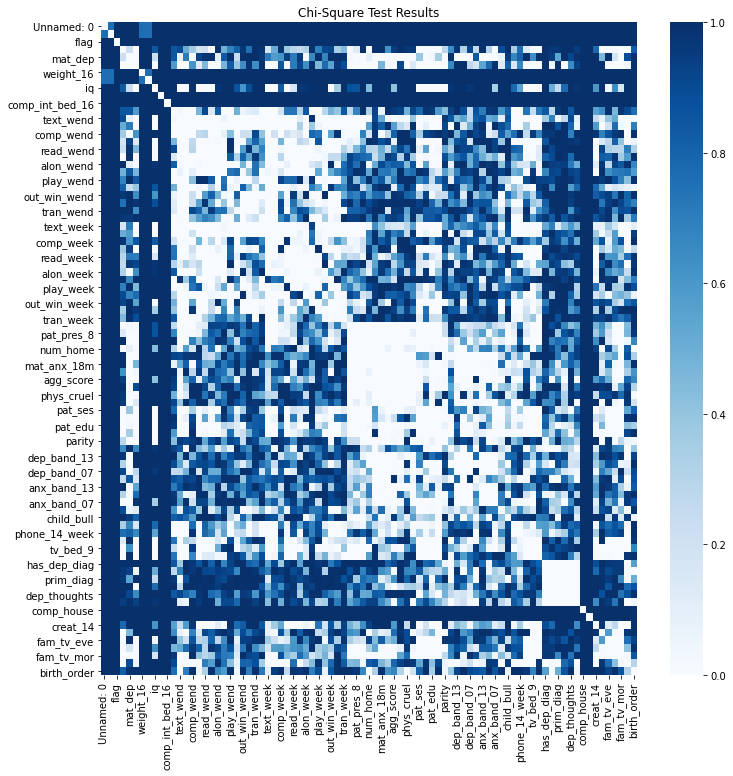

In [4]:
import seaborn as sns
resultant.to_csv(r'my_data.csv', index=False)
fig = plt.figure(figsize=(12,12))
sns.heatmap(resultant, annot=False, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

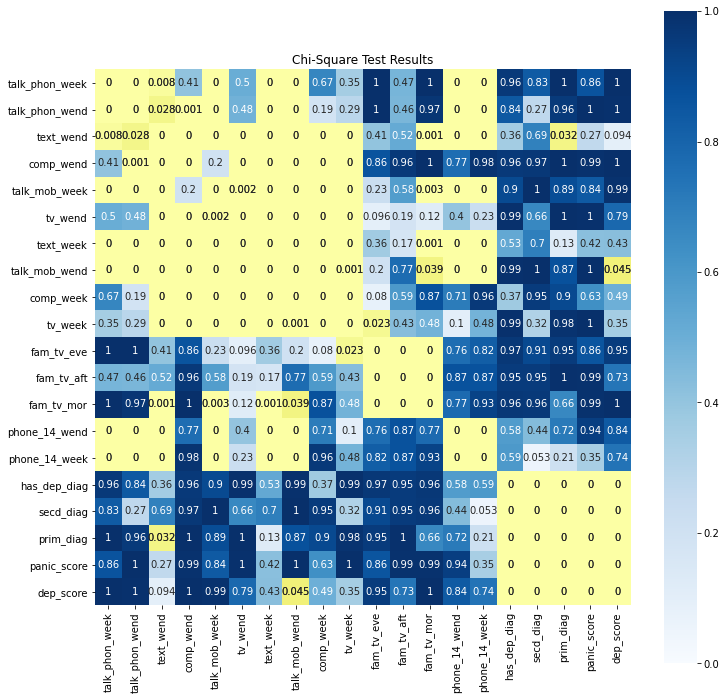

In [17]:
quantifiers = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor","phone_14_wend","phone_14_week","has_dep_diag","secd_diag","prim_diag","panic_score","dep_score"]
fig = plt.figure(figsize=(12,12))
sns.heatmap(resultant.loc[quantifiers,quantifiers].round(decimals = 3), annot=True, cmap='Blues')
sns.heatmap(resultant.loc[quantifiers,quantifiers].round(decimals = 3), mask=resultant.loc[quantifiers,quantifiers].round(decimals = 3) > 0.05, cmap='inferno_r', square=True, annot=True, vmin=0, vmax=1, cbar=False)
plt.title('Chi-Square Test Results')
plt.show()

In [ ]:
knndf = pd.read_csv("KNN_Imputation_data.csv")
display(knndf)
resultant = pd.DataFrame(data=[(0 for i in range(len(knndf.columns))) for i in range(len(knndf.columns))], 
                         columns=list(knndf.columns))
resultant.set_index(pd.Index(list(knndf.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix

passing_all_deps = []
depressedcols = ["secd_diag","prim_diag","panic_score","dep_score"]
for row in knndf.columns:
    for col in knndf.columns:
        if (row!=col):
            test = knndf[[col,row]]
            test = test.dropna()
            #display(test)
            contingency = pd.crosstab(index=test[col], columns=test[row],margins=True)
            stat, p, dof, expected = chi2_contingency(contingency)
            resultant.loc[row,col] = p
            #alpha = 0.025
            print(row+' vs '+col+' = '+str(p))
            #print("p value for "+col+" is " + str(p))
            #if p <= alpha:
                #print("p value for "+col+" is " + str(p))
                #print('Dependent (reject H0)')
                #if col not in passing_all_deps:
                    #passing_all_deps.append(col)
            #else:
                #print('Independent (H0 holds true)')
                #hello=1
print(resultant)

,Unnamed: 0,Unnamed: 0.1,X,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,...,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
0,0,1.0,1.0,0.0,3.0,30.0,59.294132,181.602831,107.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0
1,1,2.0,2.0,0.0,9.0,26.0,68.600018,174.780866,85.0,1.0,...,0.4,1.0,1.0,0.2,0.6,0.4,1.2,1.8,1.0,1.0
2,2,3.0,3.0,0.0,3.0,24.0,66.922573,177.915980,105.6,1.0,...,0.0,1.0,1.0,0.6,0.4,0.0,1.0,2.0,0.0,0.0
3,3,4.0,4.0,0.0,5.8,22.0,49.812426,160.224186,98.6,1.0,...,0.0,1.0,1.0,0.4,0.0,0.2,1.2,1.8,0.0,0.0
4,4,5.0,5.0,0.0,8.0,31.0,62.270030,191.703227,132.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,13729,13730.0,13730.0,0.2,13.0,27.0,60.726911,172.031238,100.6,1.0,...,0.4,1.0,1.0,0.6,0.2,1.0,1.0,1.0,1.0,0.0
13730,13730,13731.0,13731.0,0.0,6.0,29.0,57.702347,169.844936,105.6,1.0,...,0.4,1.0,1.0,0.4,0.0,1.0,2.0,2.0,0.0,0.0
13731,13731,13732.0,13732.0,0.0,21.0,37.0,58.075832,169.235565,108.0,1.0,...,0.4,1.0,1.0,1.0,0.0,2.0,2.0,2.0,0.0,0.0
13732,13732,13733.0,13733.0,0.0,10.0,30.0,57.898388,171.383783,103.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0


Unnamed: 0 vs Unnamed: 0.1 = 0.7602446062631142
Unnamed: 0 vs X = 0.7602446062631142
Unnamed: 0 vs comp_bed_9 = 1.0
Unnamed: 0 vs mat_dep = 1.0
Unnamed: 0 vs mat_age = 1.0
Unnamed: 0 vs weight_16 = 0.7714362949973166
Unnamed: 0 vs height_16 = 0.7707323928937047
Unnamed: 0 vs iq = 0.9999995735693193
Unnamed: 0 vs comp_noint_bed_16 = 1.0
Unnamed: 0 vs comp_int_bed_16 = 1.0
Unnamed: 0 vs talk_phon_wend = 1.0
Unnamed: 0 vs text_wend = 1.0
Unnamed: 0 vs talk_mob_wend = 1.0
Unnamed: 0 vs comp_wend = 1.0
Unnamed: 0 vs musi_wend = 1.0
Unnamed: 0 vs read_wend = 1.0
Unnamed: 0 vs work_wend = 1.0
Unnamed: 0 vs alon_wend = 1.0
Unnamed: 0 vs draw_wend = 1.0
Unnamed: 0 vs play_wend = 1.0
Unnamed: 0 vs tv_wend = 1.0
Unnamed: 0 vs out_win_wend = 1.0
Unnamed: 0 vs out_sum_wend = 1.0
Unnamed: 0 vs tran_wend = 1.0
Unnamed: 0 vs talk_phon_week = 1.0
Unnamed: 0 vs text_week = 1.0
Unnamed: 0 vs talk_mob_week = 1.0
Unnamed: 0 vs comp_week = 1.0
Unnamed: 0 vs musi_week = 1.0
Unnamed: 0 vs read_week = 1.0
Unna

comp_bed_9 vs talk_mob_week = 4.4446409931925815e-135
comp_bed_9 vs comp_week = 2.99646915802741e-165
comp_bed_9 vs musi_week = 1.3021251899832795e-175
comp_bed_9 vs read_week = 5.767205897685808e-166
comp_bed_9 vs work_week = 1.125298867987705e-164
comp_bed_9 vs alon_week = 1.546071601013486e-162
comp_bed_9 vs draw_week = 2.297973440925928e-159
comp_bed_9 vs play_week = 5.5646682695401746e-114
comp_bed_9 vs tv_week = 1.0678546386856665e-138
comp_bed_9 vs out_win_week = 1.3293766641431384e-161
comp_bed_9 vs out_sum_week = 3.689163907020492e-201
comp_bed_9 vs tran_week = 2.656976536664567e-190
comp_bed_9 vs pat_pres_10 = 0.0
comp_bed_9 vs pat_pres_8 = 1.5743939573596223e-298
comp_bed_9 vs pat_pres = 1.41418335205728e-106
comp_bed_9 vs mat_anx_1 = 3.1608314646725796e-182
comp_bed_9 vs mat_anx_18m = 2.876386686166109e-129
comp_bed_9 vs mat_anx_8m = 4.021336243298183e-90
comp_bed_9 vs agg_score = 2.0691155297914974e-37
comp_bed_9 vs emot_cruel = 2.50761990703023e-29
comp_bed_9 vs phys_crue

mat_age vs dep_band_10 = 8.957571354693265e-41
mat_age vs dep_band_07 = 2.2755598351878058e-140
mat_age vs anx_band_15 = 0.00017242207647484253
mat_age vs anx_band_13 = 5.799074429951637e-06
mat_age vs anx_band_10 = 1.865818349578806e-05
mat_age vs anx_band_07 = 9.217786963697782e-100
mat_age vs exercise = 0.5695365785326414
mat_age vs child_bull = 5.2828064580775104e-08
mat_age vs phone_14_wend = 3.292247017345849e-11
mat_age vs phone_14_week = 7.059181461116294e-09
mat_age vs musi_13 = 1.4404841872873084e-47
mat_age vs tv_bed_9 = 8.717851267950633e-106
mat_age vs own_mob = 4.1297184669592755e-09
mat_age vs has_dep_diag = 0.5078147222719435
mat_age vs secd_diag = 0.9998903088516033
mat_age vs prim_diag = 7.51163080077551e-29
mat_age vs panic_score = 0.8498376214164509
mat_age vs dep_thoughts = 0.001468279096883965
mat_age vs dep_score = 0.3552112392571318
mat_age vs comp_house = 1.0
mat_age vs tv_bed_16 = 1.0
mat_age vs creat_14 = 2.897260015486975e-49
mat_age vs comp_games = 1.819512